In [12]:
import os
import torch
from torch import distributions
from models.gan import Generator, Discriminator
from utils.checkpointio import CheckpointIO
import matplotlib.pyplot as plt 
from pathlib import *

In [43]:
device = 'cpu'

In [75]:
def get_samples(sample_size):
    z = zdist.sample((sample_size,))
    generator.eval()
    batch_size = z.size(0)
    # Sample x
    with torch.no_grad():
        x = generator(z)
        x =  x / 2 + 0.5
    return x


def get_zdist(dim, device=None):
    # Get distribution
    mu = torch.zeros(dim, device=device)
    scale = torch.ones(dim, device=device)
    zdist = distributions.Normal(mu, scale)

    # Add dim attribute
    zdist.dim = dim

    return zdist

In [76]:
checkpoint_dir = 'ckpt/'
batch_size = 64
d_steps = 1

c_dim = 20
z_dist_dim = 256
nc = 3
img_size = 64

nfilter_generator = 64
nfilter_max_generator = 512

nfilter_discriminator = 64
nfilter_max_discriminator = 512

generator = Generator(
    z_dim=z_dist_dim + c_dim,
    size=img_size,
    nfilter=nfilter_generator, 
    nfilter_max=nfilter_max_generator
)
discriminator = Discriminator(
    z_dim=z_dist_dim + c_dim,
    size=img_size,
    nfilter=nfilter_discriminator, 
    nfilter_max=nfilter_max_discriminator
)

generator = generator.to(device)
discriminator = discriminator.to(device)

In [155]:
checkpoint_io = CheckpointIO(
    checkpoint_dir=checkpoint_dir
)

# Register modules to checkpoint
checkpoint_io.register_modules(
    generator=generator,
    discriminator=discriminator,
)

model_path = Path(checkpoint_dir).joinpath('model.pt').resolve()
it = checkpoint_io.load(model_path)

=> Loading checkpoint...


In [156]:
cdist = get_zdist(c_dim, device=device)
zdist = get_zdist(z_dist_dim + c_dim, device=device)


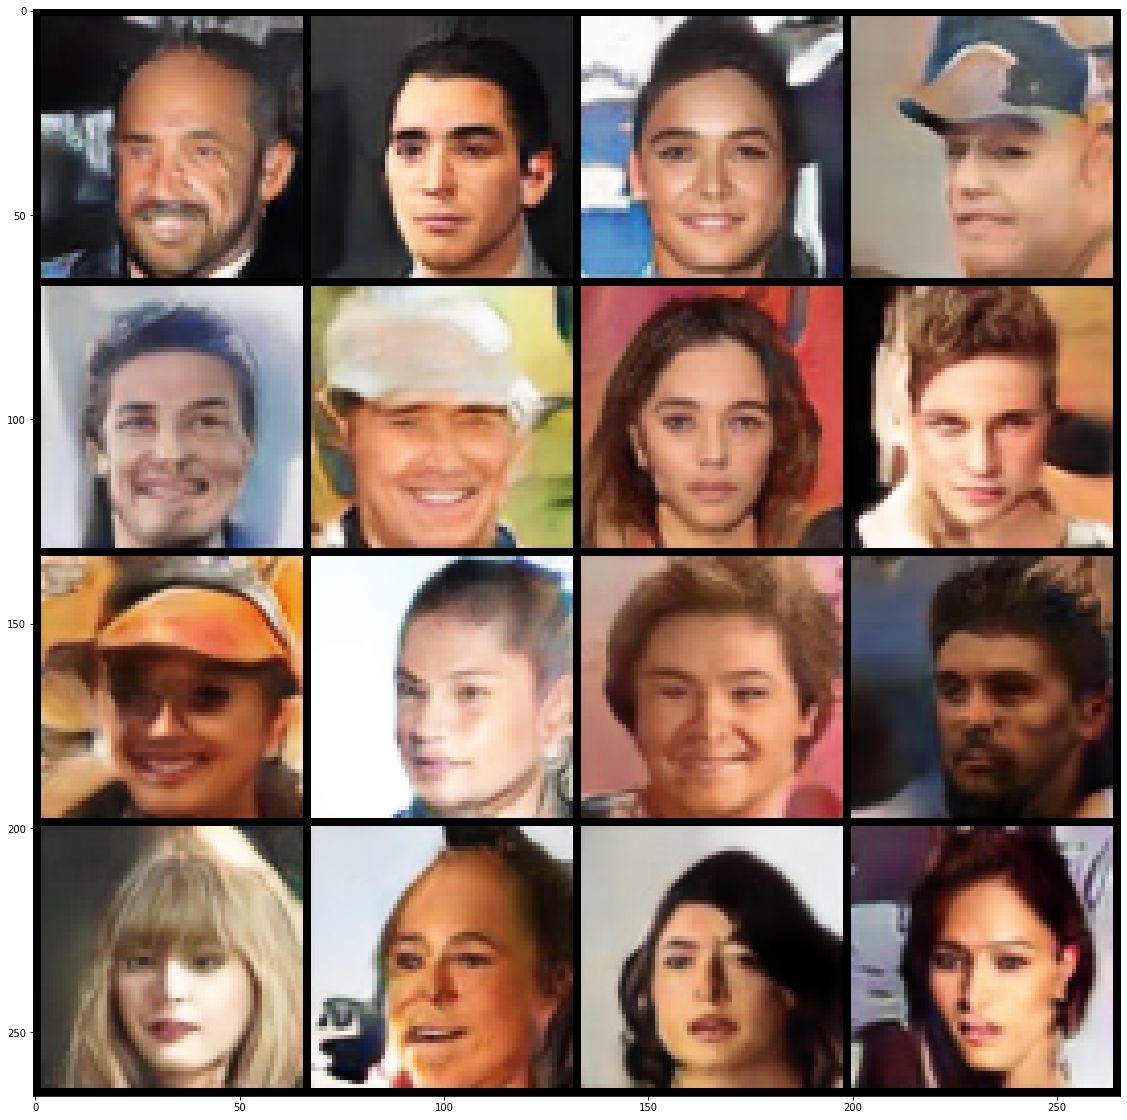

In [160]:
import torchvision
num_samples = 16
imgs = get_samples(num_samples)
grid_img = torchvision.utils.make_grid(imgs, nrow=4)
grid_img.shape
plt.figure(figsize = (20,20))
plt.imshow(grid_img.cpu().permute(1, 2, 0))

In [150]:
torchvision.utils.save_image(imgs,  'imgs/'+ 'generated.png', nrow=4)